In [2]:
using DrWatson
using DataFrames
using HDF5
using Statistics
using Plots
using LaTeXStrings
using CSVFiles

┌ Info: Precompiling CSVFiles [5d742f6a-9f54-50ce-8119-2520741973ca]
└ @ Base loading.jl:1313


In [24]:
datapath = datadir("chemotaxis", "2021-04-05")

"/home/ipausers/reinhardt/GaussianMcmc.jl/data/chemotaxis/2021-04-05"

In [25]:
sims = map(filter(endswith(".hdf5"), readdir(datapath, sort=true, join=true))) do p
    (prefix, params, suffix) = parse_savename(basename(p))
    h5open(p) do file
        mi = read(file["Samples/MutualInformation"])
        mi_mean = vec(mean(mi, dims=2))
        mi_var = vec(var(mi, dims=2) ./ size(mi, 2))
        dtimes = read(file["DiscreteTimes"])
        DataFrame(
            DiscreteTimes=dtimes,
            Mean=mi_mean,
            Var=mi_var,
        )
    end
end

sims = vcat(sims...)

,DiscreteTimes,Mean,Var
,Float64,Float64,Float64
1,0.0,0.0,0.0
2,0.04,0.0100586,4.50738e-6
3,0.08,0.0683567,2.21277e-5
4,0.12,0.146025,5.1892e-5
5,0.16,0.256494,8.64966e-5
6,0.2,0.371364,0.000124141
7,0.24,0.502307,0.000155077
8,0.28,0.642383,0.000192866
9,0.32,0.772877,0.000234369


In [27]:
# save(joinpath(datapath, "data.csv"), sims)

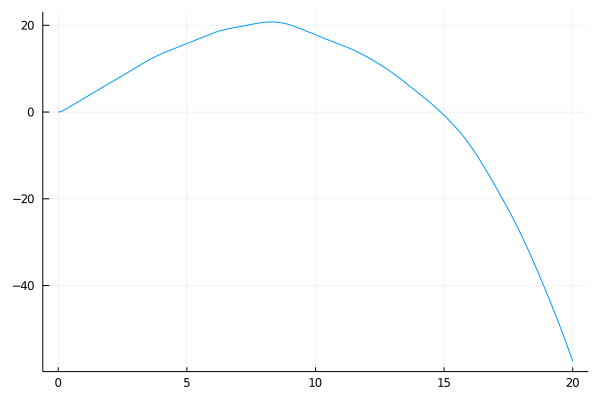

In [29]:
plot(sims.DiscreteTimes, sims.Mean, label="")

In [23]:
p = plot()
for g in groupby(sims, [:CorrTimeRatio, :MeanS])
    τx = 1/g.CorrTimeRatio[1]
    label = L"\tau_x = %$τx"
    plot!(p, g.DiscreteTimes, g.Mean, ribbon=sqrt.(g.Var), label=label) 
end
plot!(p, legend=:topleft)

LoadError: ArgumentError: column name :CorrTimeRatio not found in the data frame

In [31]:
data = map(filter(endswith(".hdf5"), readdir(datapath, sort=true, join=true))) do p
    (prefix, params, suffix) = parse_savename(p)
    h5open(p) do file
        mi = read(file["Samples/MutualInformation"])
    end
end

1-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; -0.1849998695333852 0.012175801187368052 … 0.11153166086023703 -0.49887243482362464; … ; 89.60967010771856 62.01641678879969 … 61.80556818144396 67.97050112299621; 89.38560285628773 62.52331323479302 … 61.80546485632658 67.17172704776749]

In [33]:
time_marginal, time_conditional = h5open(joinpath(datapath, "Duration=20_TauLR=0.01_TauY=0.1.hdf5")) do file
    read(file["Samples/TimeMarginal"]), read(file["Samples/TimeConditional"])
end

([285.51218964, 288.928207349, 294.492691278, 295.331582793, 247.694598804, 308.930765043, 299.828598847, 315.429825562, 318.819851325, 313.284546932  …  232.135197978, 235.043728499, 245.442353496, 235.687125884, 230.935666606, 239.429446208, 232.394531936, 237.102319556, 233.167339585, 238.045677992], [319.642533087, 333.109857204, 339.083520447, 333.836337966, 355.508695995, 332.388918847, 311.266419905, 325.253984644, 329.475559145, 324.508005362  …  259.559328939, 247.597820527, 260.265483415, 247.381368566, 241.833757786, 254.001128544, 244.667734751, 248.67594685, 268.399915864, 256.742998541])

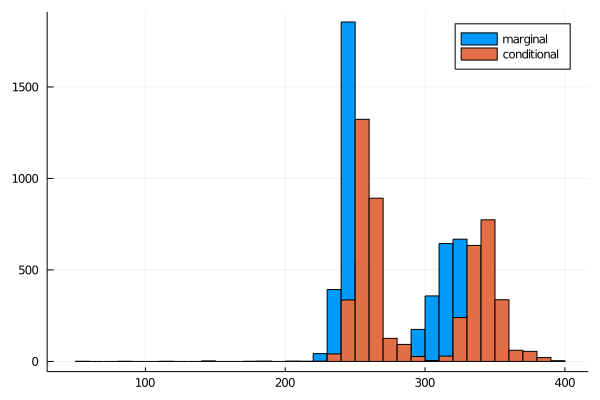

In [34]:
histogram([time_marginal, time_conditional], label=["marginal" "conditional"])

In [35]:
clean_data = hcat(filter(x->minimum(x) > -1e2, collect(eachcol(data[1])))...)

501×4982 Matrix{Float64}:
  0.0         0.0         0.0       …   0.0        0.0        0.0
 -0.185       0.0121758   0.087942      0.577297   0.111532  -0.498872
 -0.297441    0.116387    0.51539       0.666429   0.297441  -0.141232
  0.0905903   0.117552    0.611203      1.00995    0.310798  -0.350678
  0.190975    0.105852    0.16507       1.20607    0.380804  -0.341864
  0.152642    0.414253   -0.174787  …   1.35852    0.578389   0.40634
  0.406207    0.391433    0.894671      1.71341   -0.254173   0.512824
  0.365021   -0.0314144   1.84965       1.83816   -1.16059    0.612182
 -0.368447   -0.109292    1.81707       1.88306   -0.83024    1.11666
  0.037939    0.206808    2.99587       1.76523   -1.3046     0.779358
  0.103007    0.286338    2.4824    …   2.04605   -0.86337   -0.649505
 -0.245523    0.238762    2.42585       2.43016   -0.641988  -0.455705
 -0.966737   -0.527137    2.33644       2.61982   -0.758664  -0.51533
  ⋮                                 ⋱              ⋮       

In [41]:
dirty_data = hcat(filter(x->minimum(x) < -1e2, collect(eachcol(data[1])))...)

501×18 Matrix{Float64}:
      0.0             0.0        …       0.0             0.0
      0.0301225       0.048203          -0.178971        0.0152948
      0.0616258      -0.0638299         -0.310473       -0.0185698
     -0.0404251      -0.0180618         -0.349301        0.0813778
     -0.158428        0.498771           0.0594283       0.123938
      0.0166198       0.385021   …       0.909607        0.634639
      0.187268        1.24564            1.21641         0.880962
      0.568647        0.574731           1.47056         0.495289
      0.484953        0.680393           1.55693         0.540933
      0.9473          1.37415            1.46493         0.120359
      0.125998        1.83542    …       1.74791         0.0655003
      0.354192        1.72577            1.98946         0.115545
      1.0976          1.13554            1.97106         0.177021
      ⋮                          ⋱                  
  -9889.06       -60269.6            -8010.87        -8654.39
 -10

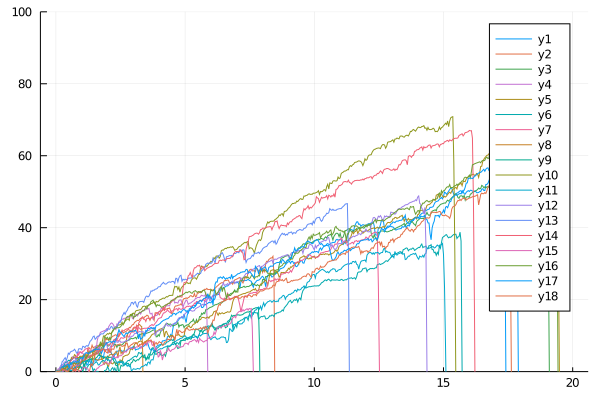

In [45]:
plot(sims.DiscreteTimes, dirty_data, ylim=(0,100))

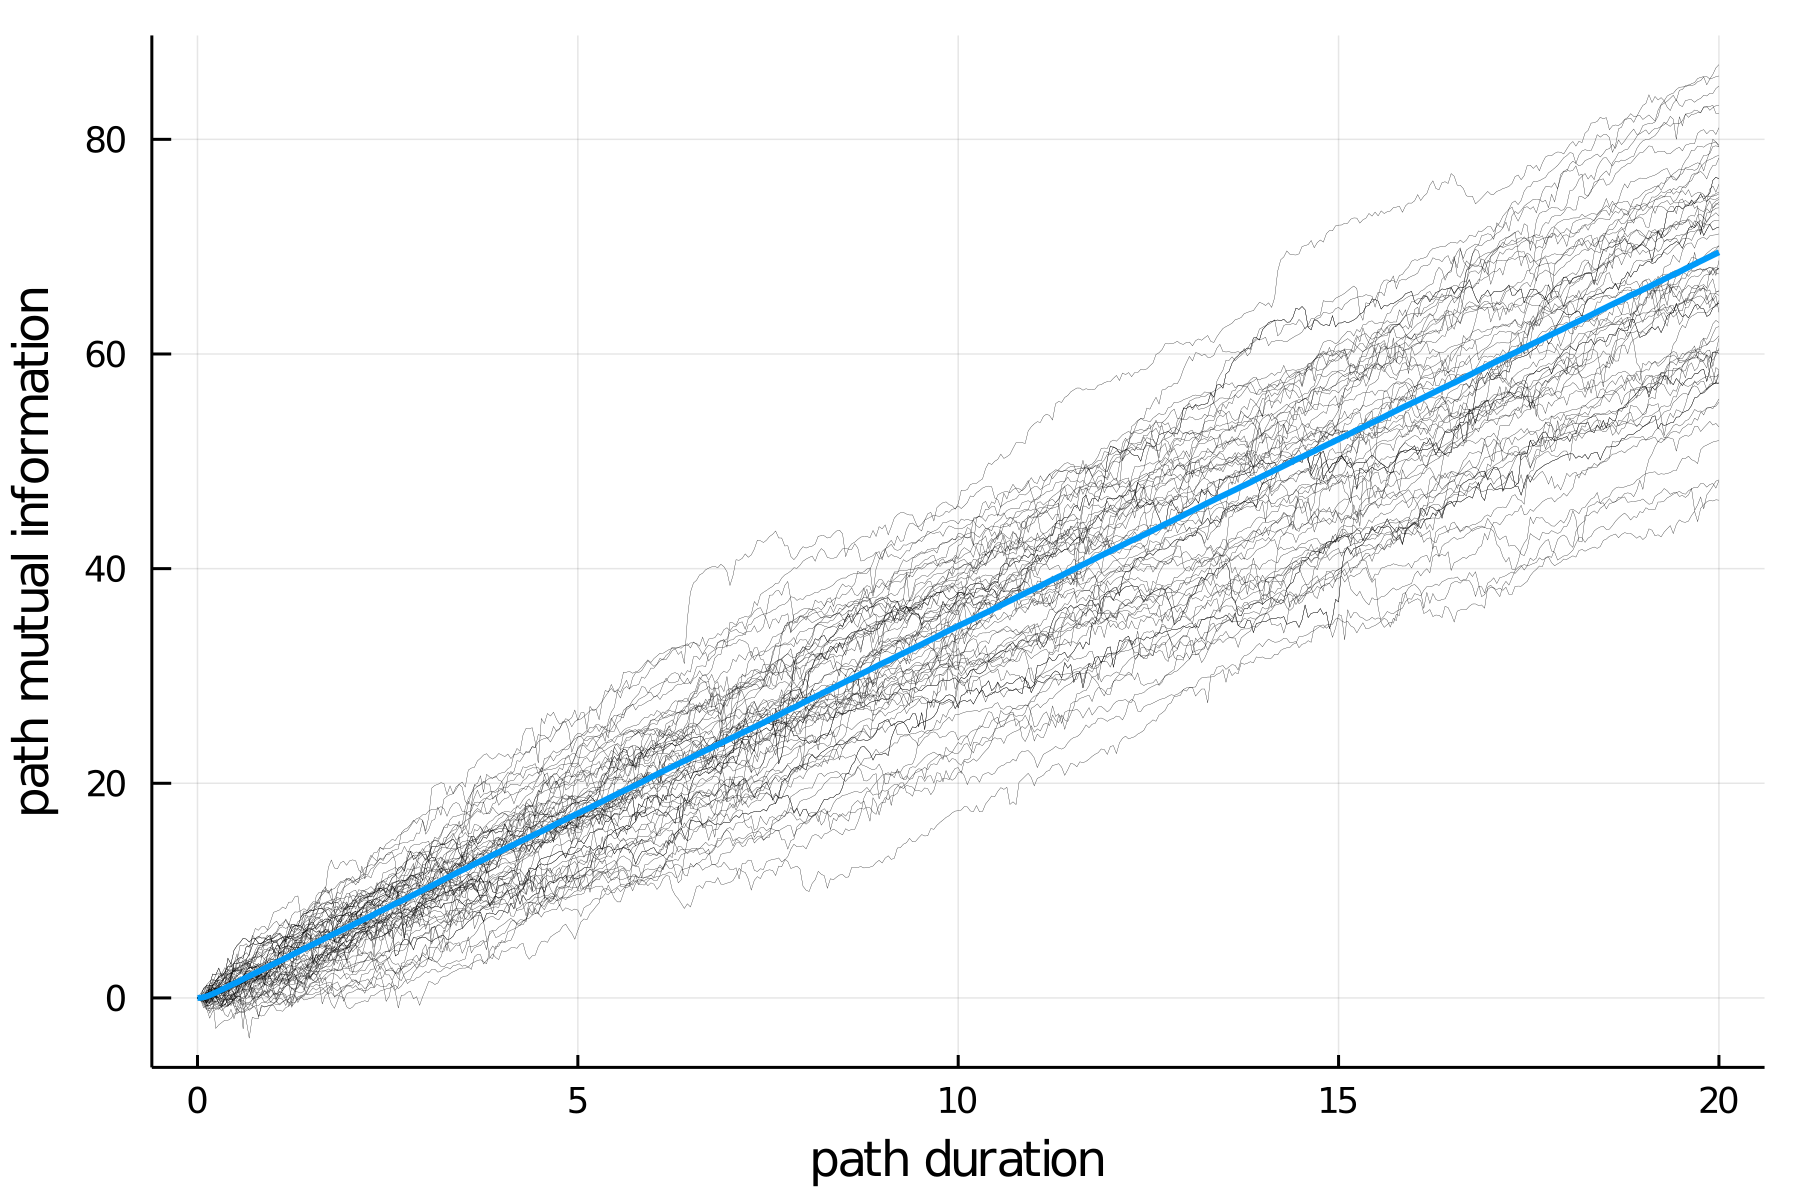

In [37]:
p = plot()
for i in rand(1:size(clean_data, 1), 64)
    plot!(p, sims.DiscreteTimes, clean_data[:, i], color=:black, linewidth=0.1, label="")
end
plot!(p, sims.DiscreteTimes, vec(mean(clean_data, dims=2)), color=1, linewidth=2, label="")
plot!(p, xlabel="path duration", ylabel="path mutual information")
plot!(p, dpi=300)
# savefig(p, joinpath(datapath, "figure.png"))

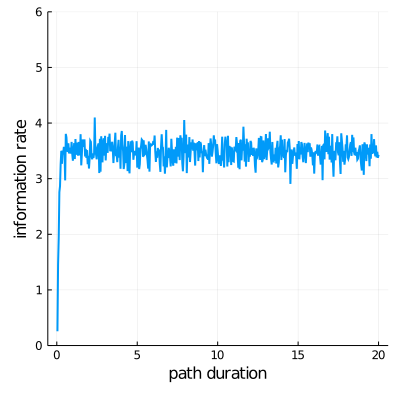

In [39]:
plot(sims.DiscreteTimes[2:end], diff(vec(mean(clean_data, dims=2))) ./ diff(sims.DiscreteTimes), color=1, linewidth=2, label="")
plot!(xlabel="path duration", ylabel="information rate", ylim=(0,6), size=(400, 400))
# savefig(joinpath(datapath, "rate.pdf"))